# <div style="text-align: center"> **Corso di Probabilità e Statistica** </div> 
### <div style="text-align: center"> Esame 28-01-2021 </div> 
***
## <div style="text-align: right"> Edoardo Tronconi </div> <div style="text-align: right"> n. matricola: 975734 </div>
***

# Librerie necessarie

In [1]:
import numpy as np # operazioni su vettori
import pandas as pd # data analysis
import matplotlib.pyplot as plt # grafici
import seaborn as sns # grafici

# Impostazioni grafiche

In [2]:
pd.set_option('display.max_columns', None) # mostra tutte le colonne di un dataframe

In [3]:
params = {
    'figure.figsize' : [18,12],
    'font.size' : 15,
}

plt.rcParams.update(params)

# Importo i dati

Uso come `MultiIndex` le Regioni, le Province e i Comuni

Rimuovo le colonne `incremento %` poichè non sono significative quando si raggruppano i dati per regione o provincia tramite `df.groupby`: la media degli incrementi percentuali non corrisponde all'incremento per provincia (o regione) in quanto i comuni hanno diverso numero di decessi tra loro. 

Ottengo per ogni foglio del documento excel un dataframe e poi li unisco tutti in un unico DataFrame `DATA`

In [4]:
df_decessi_mesi = pd.read_excel('./Tavola riepilogativa_30GIUGNO_7.357COMUNI.xlsx', sheet_name = 'Totale per mese', header = [0,1], index_col=[0,1]).replace('-', np.nan)
df_decessi_mesi.index.names = ['REG', 'PROV']
df_decessi_mesi.columns.names = [None,None]
df_decessi_mesi.drop(columns=[('COD_PROVCOM')], level=1, inplace=True)

#creo un dataframe contenente solo i nomi delle regioni
df_nomi_RegProvCom = df_decessi_mesi[['totale decessi']].rename(columns={'totale decessi': None})

#Rinomino le colonne con i nomi dei mesi
df_decessi_mesi.rename(columns={
                                '01/01 - 31/01' : 'Gen',
                                '01/02 - 29/02' : 'Feb',
                                '01/03 -31/03' : 'Mar',
                                '01/04 -30/04' : 'Apr',
                                '01/05 -31/05' : 'Mag',
                                '01/06 -30/06' : 'Giu',
                                },
                        level=1, inplace=True)

#rinomino la colonna 2020 in modo che il nome sia una stringa anzichè un int, per coerenza con gli altri label
df_decessi_mesi.rename(columns={
                                2020 : '2020'
                                },
                        level=0, inplace=True)

#rimuovo colonne non utili
df_decessi_mesi.drop(columns=['incremento %', 'totale decessi'], level=0, inplace=True)

df_decessi_sesso = pd.read_excel('./Tavola riepilogativa_30GIUGNO_7.357COMUNI.xlsx', sheet_name = 'Totale per sesso', header = [0,1], index_col=[0,1]).replace('-', np.nan)
df_decessi_sesso.index.names = ['REG', 'PROV']
df_decessi_sesso.columns.names = [None,None]

df_decessi_sesso.drop(columns=[('COD_PROVCOM')], level=1, inplace=True)
df_decessi_sesso.drop(columns=['incremento %','totale decessi'], level=0, inplace=True)

df_decessi_sesso.rename(columns={
                                '1 MARZO - 30 GIUGNO MEDIA 2015-2019' : 'MEDIA 2015-2019 marzo-giugno',
                                '1 MARZO - 30 GIUGNO 2020' : '2020',
                                },
                        level=0, inplace=True)

df_decessi_over65 = pd.read_excel('./Tavola riepilogativa_30GIUGNO_7.357COMUNI.xlsx', sheet_name = 'Età65+ Totale', header = [0,1], index_col=[0,1]).replace('-', np.nan)
df_decessi_over65.index.names = ['REG', 'PROV']
df_decessi_over65.columns.names = [None,None]

df_decessi_over65.drop(columns=[('COD_PROVCOM')], level=1, inplace=True)
df_decessi_over65.drop(columns=['incremento %','totale decessi'], level=0, inplace=True)

df_decessi_over65.rename(columns={
                                '1 MARZO - 30 GIUGNO MEDIA 2015-2019' : 'MEDIA 2015-2019 marzo-giugno',
                                '1 MARZO - 30 GIUGNO 2020' : '2020',
                                },
                        level=0, inplace=True)

df_decessi_over65M = pd.read_excel('./Tavola riepilogativa_30GIUGNO_7.357COMUNI.xlsx', sheet_name = 'Età65+ Maschi', header = [0,1], index_col=[0,1]).replace('-', np.nan)
df_decessi_over65M.index.names = ['REG', 'PROV']
df_decessi_over65M.columns.names = [None,None]

df_decessi_over65M.drop(columns=[('COD_PROVCOM')], level=1, inplace=True)
df_decessi_over65M.drop(columns=['incremento %','totale decessi'], level=0, inplace=True)

df_decessi_over65M.rename(columns={
                                '1 MARZO - 30 GIUGNO MEDIA 2015-2019' : 'MEDIA 2015-2019 marzo-giugno',
                                '1 MARZO - 30 GIUGNO 2020' : '2020',
                                },
                        level=0, inplace=True)

df_decessi_over65F = pd.read_excel('./Tavola riepilogativa_30GIUGNO_7.357COMUNI.xlsx', sheet_name = 'Età65+ Femmine', header = [0,1], index_col=[0,1]).replace('-', np.nan)
df_decessi_over65F.index.names = ['REG', 'PROV']
df_decessi_over65F.columns.names = [None,None]

df_decessi_over65F.drop(columns=[('COD_PROVCOM')], level=1, inplace=True)
df_decessi_over65F.drop(columns=['incremento %','totale decessi'], level=0, inplace=True)

df_decessi_over65F.rename(columns={
                                '1 MARZO - 30 GIUGNO MEDIA 2015-2019' : 'MEDIA 2015-2019 marzo-giugno',
                                '1 MARZO - 30 GIUGNO 2020' : '2020',
                                },
                        level=0, inplace=True)

In [273]:
DATA = pd.concat([df_nomi_RegProvCom, df_decessi_mesi, df_decessi_sesso, df_decessi_over65, df_decessi_over65M, df_decessi_over65F],keys=['NOMI', 'MESI','SESSO','OVER 65','OVER 65 M','OVER 65 F'], axis=1)
DATA = DATA.reset_index().set_index([('NOMI',None,'NOME_REGIONE'),('NOMI',None,'NOME_PROVINCIA'),('NOMI',None,'NOME_COMUNE')]).drop(columns=['REG','PROV'], level=0)

DATA.index.names = ['REGIONE', 'PROVINCIA','COMUNE']
DATA.columns.names = ['FOGLIO EXCEL', 'ANNI',None]
DATA.sort_index(inplace=True)

DATA = round(DATA,1)
DATA

FOGLIO EXCEL                            MESI                               \
ANNI                         MEDIA 2015-2019                                
                                         Gen   Feb   Mar   Apr   Mag  Giu   
REGIONE PROVINCIA COMUNE                                                    
Abruzzo Chieti    Altino                 3.4   2.2   2.6   2.8   1.2  3.0   
                  Archi                  4.4   2.0   3.2   3.8   2.0  2.8   
                  Arielli                1.2   0.4   1.0   1.0   1.2  1.6   
                  Atessa                13.4  10.0  12.0  11.8  11.0  8.4   
                  Bomba                  0.8   1.8   1.4   1.0   0.4  0.8   
...                                      ...   ...   ...   ...   ...  ...   
Veneto  Vicenza   Villaverla             5.4   3.4   2.4   4.2   4.0  3.2   
                  Zanè                   5.6   5.8   3.0   3.0   3.2  3.4   
                  Zermeghedo             1.6   0.8   0.2   0.8   0.6  1.0   
                  Zovencedo              1.4   0.4   1.2   0.8   0.2  0.6   
                  Zugliano               3.2   4.4   3.6   3.0   3.8  2.2   

FOGLIO EXCEL                                           \
ANNI                         2020                       
                              Gen Feb Mar Apr Mag Giu   
REGIONE PROVINCIA COMUNE                                
Abruzzo Chieti    Altino        3   0   5   1   5   3   
                  Archi         4   7   3   1   5   1   
                  Arielli       2   2   1   2   1   1   
                  Atessa       12  11  14  11  11  13   
                  Bomba         2   2   1   0   1   0   
...                           ...  ..  ..  ..  ..  ..   
Veneto  Vicenza   Villaverla    5   6   6   5   7   2   
                  Zanè          6   5   6   8   3   4   
                  Zermeghedo    0   0   1   1   2   0   
                  Zovencedo     1   1   0   1   2   1   
                  Zugliano      6   6  10   2   5   2   

FOGLIO EXCEL                                        SESSO                   \
ANNI                         MEDIA 2015-2019 marzo-giugno             2020   
                                                        M     F   M+F    M   
REGIONE PROVINCIA COMUNE                                                     
Abruzzo Chieti    Altino                              4.8   4.8   9.6    8   
                  Archi                               5.8   6.0  11.8    3   
                  Arielli                             2.0   2.8   4.8    3   
                  Atessa                             22.2  21.0  43.2   25   
                  Bomba                               1.8   1.8   3.6    0   
...                                                   ...   ...   ...  ...   
Veneto  Vicenza   Villaverla                          7.6   6.2  13.8   10   
                  Zanè                                7.4   5.2  12.6   12   
                  Zermeghedo                          1.4   1.2   2.6    1   
                  Zovencedo                           1.8   1.0   2.8    3   
                  Zugliano                            5.6   7.0  12.6   13   

FOGLIO EXCEL                                              OVER 65        \
ANNI                                 MEDIA 2015-2019 marzo-giugno         
                               F M+F                        65-74 75-84   
REGIONE PROVINCIA COMUNE                                                  
Abruzzo Chieti    Altino       6  14                          1.2   1.8   
                  Archi        7  10                          1.4   3.2   
                  Arielli      2   5                          0.0   1.8   
                  Atessa      24  49                          6.0  13.8   
                  Bomba        2   2                          0.2   1.8   
...                           ..  ..                          ...   ...   
Veneto  Vicenza   Villaverla  10  20                          1.8  

***
# Analisi

Aggiungo colonne con totali e UNDER 65

In [299]:
#Aggiungo colonne per il totale dei decessi nei mesi da gennaio a giugno, e negli OVER65 e UNDER65
def calcola_totali(df):
    dfOut = df.copy()
    for FOGLIO in df.columns.get_level_values(0).unique():
        for ANNI in df.loc[:,(FOGLIO,slice(None))].columns.get_level_values(1).unique():
            dfOut.loc[:,(FOGLIO,ANNI,'totale')] = df.loc[:,(FOGLIO,ANNI,slice(None))].sum(axis=1)
    dfOut = dfOut.loc[:,(slice(None), slice(None),'totale')]
    return dfOut

DATA = DATA.drop(columns=['totale'], level=2, errors='ignore').join(calcola_totali(DATA.drop(columns=['SESSO']).drop(columns=['totale'], level=2, errors='ignore'))).sort_index(axis=1, level=[0,1], sort_remaining=False)

#Aggiungo colonne per i decessi UNDER 65
for sesso in ['M','F']:
    for anni in DATA.loc[:,('OVER 65', slice(None))].columns.get_level_values(1):
        DATA.loc[:,('UNDER 65', anni, 'totale '+sesso)] = round(DATA.loc[:,('SESSO', anni, sesso)] - DATA.loc[:,('OVER 65 '+sesso, anni, 'totale')],1)
        
for anni in DATA.loc[:,('OVER 65', slice(None))].columns.get_level_values(1):
        DATA.loc[:,('UNDER 65', anni, 'totale')] = round(DATA.loc[:,('SESSO', anni, 'M+F')] - DATA.loc[:,('OVER 65', anni, 'totale')],1)


DATA.sort_index(axis=1, level=[0,1], sort_remaining=False, inplace=True)
DATA

MESI                                             \
                             2020                            MEDIA 2015-2019   
                              Gen Feb Mar Apr Mag Giu totale             Gen   
REGIONE PROVINCIA COMUNE                                                       
Abruzzo Chieti    Altino        3   0   5   1   5   3     17             3.4   
                  Archi         4   7   3   1   5   1     21             4.4   
                  Arielli       2   2   1   2   1   1      9             1.2   
                  Atessa       12  11  14  11  11  13     72            13.4   
                  Bomba         2   2   1   0   1   0      6             0.8   
...                           ...  ..  ..  ..  ..  ..    ...             ...   
Veneto  Vicenza   Villaverla    5   6   6   5   7   2     31             5.4   
                  Zanè          6   5   6   8   3   4     32             5.6   
                  Zermeghedo    0   0   1   1   2   0      4             1.6   
                  Zovencedo     1   1   0   1   2   1      6             1.4   
                  Zugliano      6   6  10   2   5   2     31             3.2   

                                                                 OVER 65  \
                                                                    2020   
                               Feb   Mar   Apr   Mag  Giu totale   65-74   
REGIONE PROVINCIA COMUNE                                                   
Abruzzo Chieti    Altino       2.2   2.6   2.8   1.2  3.0   15.2       3   
                  Archi        2.0   3.2   3.8   2.0  2.8   18.2       1   
                  Arielli      0.4   1.0   1.0   1.2  1.6    6.4       0   
                  Atessa      10.0  12.0  11.8  11.0  8.4   66.6       5   
                  Bomba        1.8   1.4   1.0   0.4  0.8    6.2       0   
...                            ...   ...   ...   ...  ...    ...     ...   
Veneto  Vicenza   Villaverla   3.4   2.4   4.2   4.0  3.2   22.6       1   
                  Zanè         5.8   3.0   3.0   3.2  3.4   24.0       4   
                  Zermeghedo   0.8   0.2   0.8   0.6  1.0    5.0       0   
                  Zovencedo    0.4   1.2   0.8   0.2  0.6    4.6       1   
                  Zugliano     4.4   3.6   3.0   3.8  2.2   20.2       2   

                                                                               \
                                                 MEDIA 2015-2019 marzo-giugno   
                             75-84 85 e + totale                        65-74   
REGIONE PROVINCIA COMUNE                                                        
Abruzzo Chieti    Altino         5      5     13                          1.2   
                  Archi          2      7     10                          1.4   
                  Arielli        3      2      5                          0.0   
                  Atessa        18     25     48                          6.0   
                  Bomba          1      1      2                          0.2   
...                            ...    ...    ...                          ...   
Veneto  Vicenza   Villaverla     9      9     19                          1.8   
                  Zanè           3     11     18                          1.8   
                  Zermeghedo     0      4      4                          0.4   
                  Zovencedo      2      0      3                          0.0   
                  Zugliano       8      7     17                          1.8   

                                                 OVER 65 F               \
                                                      2020                
                             75-84 85 e + totale     65-74 75-84 85 e +   
REGIONE PROVINCIA COMUNE                                                  
Abruzzo Chieti    Altino       1.8    5.4    8.4         2     2      2   
                  Archi        3.2    6.2   10.8         0     1      6   
                  Ari

## Calcolo Incrementi

In [278]:
# funzione che calcola incrementi tra 2020 e anni precedenti
def calcola_incrementi (dfIn):
    df = dfIn.sort_index(axis=1, level=[0,1], sort_remaining=False).copy()
    dfOut = df
    for FOGLIO in df.columns.get_level_values(0).unique():
        anni = df.loc[:,(FOGLIO,slice(None))].columns.get_level_values(1).unique()
        for cat in df[[FOGLIO]].columns.get_level_values(2).unique():
            dfOut.loc[:,(FOGLIO,'Incrementi %',cat)] = (df.loc[:,(FOGLIO,anni[0],cat)] - df.loc[:,(FOGLIO,anni[1],cat)])/df.loc[:,(FOGLIO,anni[1],cat)]*100
    return dfOut.loc[:,(slice(None),'Incrementi %',slice(None))].replace(np.inf,np.nan)


### Calcolo incrementi percentuali dei decessi in tutta italia (periodo marzo-giugno)

Nel complesso la mortalità tra Marzo e Giugno in italia è aumentata nel 22% circa nel 2020, rispetto alla media dei 5 anni precedenti.

L'incremento di mortalità è stato particolarmente elevato nei mesi di Marzo e Aprile (+50% e +38% rispettivamente), per poi tornare a valori vicini a zero nei mesi successivi.

L'incremento di mortalità inoltre ha interessato principalmente gli individui `OVER 65`, con un aumento del 24% (contro a un aumento del 4.5% negli `UNDER 65`), e un numero totale di decessi che rappresenta il 90% del totale. L'aumento è inoltre particolarmente marcato per gli `OVER 85` (+27%).\
All'interno di tutte le categorie inoltre si nota un maggiore aumento della mortalità negli uomini rispetto alle donne: (+24% contro +20% nella popolazione generale, +27% contro +22% negli `OVER 65` e +6.9% contro +0.4% negli `UNDER 65`)

In [279]:
SumTot = pd.DataFrame(DATA.sum()).T

SumTot.columns.names = [None, None, None]
SumTot.index = ['Totale decessi'] 
        
IncrTot = calcola_incrementi(SumTot).reorder_levels(axis=1, order=[1,0,2])['Incrementi %']
IncrTot.index = ['Incremento % tra 2020 e 5 anni precedenti']

IncrTot

MESI                       \
                                                Gen       Feb        Mar   
Incremento % tra 2020 e 5 anni precedenti -9.271761 -2.296312  50.488875   

                                                                          \
                                                 Apr       Mag       Giu   
Incremento % tra 2020 e 5 anni precedenti  37.973205  0.300532 -6.167959   

                                                        OVER 65             \
                                              totale      65-74      75-84   
Incremento % tra 2020 e 5 anni precedenti  11.505289  21.113351  20.905967   

                                                                 OVER 65 F  \
                                              85 e +     totale      65-74   
Incremento % tra 2020 e 5 anni precedenti  27.364069  24.257382  15.131061   

                                                                           \
                                               75-84    85 e +     totale   
Incremento % tra 2020 e 5 anni precedenti  15.361138  26.36386  22.021221   

                                           OVER 65 M                        \
                                               65-74      75-84     85 e +   
Incremento % tra 2020 e 5 anni precedenti  24.771371  25.661501  29.126722   

                                                         SESSO             \
                                             totale          M          F   
Incremento % tra 2020 e 5 anni precedenti  26.88057  23.946933  20.306111   

                                                     UNDER 65            \
                                                 M+F totale M  totale F   
Incremento % tra 2020 e 5 anni precedenti  22.050204  6.86245  0.421417   

                                                     
                                             totale  
Incremento % tra 2020 e 5 anni precedenti  4.474309

***
### Calcolo incrementi per regione

In [280]:
DATA_REG = DATA.groupby('REGIONE').sum()

In [281]:
calcola_incrementi(DATA_REG).reorder_levels(axis=1, order=[1,0,2])

Incrementi %                                    \
                                     MESI                                     
                                      Gen       Feb         Mar         Apr   
REGIONE                                                                       
Abruzzo                         -8.323440  1.324712   16.040689   14.479002   
Basilicata                     -12.255773  7.085346   -3.725490    9.319788   
Calabria                        -7.779720 -4.500933    5.756131    5.125922   
Campania                        -6.919275 -0.977044    2.359176   -0.403896   
Emilia-Romagna                 -10.214717 -1.146331   71.676040   52.703049   
Friuli-Venezia Giulia           -2.181322 -4.902265   15.848879   19.085593   
Lazio                           -9.736932 -4.886525    2.501737   -3.167116   
Liguria                        -17.128801 -9.379632   55.719673   60.855877   
Lombardia                      -11.223630  0.738820  191.311578  113.399821   
Marche                          -8.666351 -2.292501   49.273624   34.166794   
Molise                         -17.246521 -7.979408    5.515588   -0.806994   
Piemonte                       -14.916083 -2.986389   54.351104   73.155330   
Puglia                          -6.541826 -0.227232   12.181353   14.480519   
Sardegna                        -1.244657  0.949094   14.860065    9.125118   
Sicilia                         -6.887853 -7.012530    2.587840    1.404719   
Toscana                        -10.441369 -4.480880   14.108100   18.047008   
Trentino-Alto Adige/Südtirol    -8.403543  8.293178   69.848748   71.771523   
Umbria                         -11.258278 -3.531041    9.392024   -0.537634   
Valle d'Aosta/Vallée d'Aoste   -17.372881  0.833333   60.947712   75.182482   
Veneto                          -4.471887 -1.918152   25.163446   30.434783   

                                                                          \
                                                                 OVER 65   
                                    Mag        Giu     totale      65-74   
REGIONE                                                                    
Abruzzo                       -4.761905 -13.365420   0.852042   4.589114   
Basilicata                     0.944245 -10.800386  -1.776421   9.418283   
Calabria                       1.462271  -4.852321  -1.034047   6.011184   
Campania                      -7.015645  -9.770296  -3.706355   2.346278   
Emilia-Romagna                 3.347815   1.732647  19.162153  38.184316   
Friuli-Venezia Giulia         -9.486668  -9.219191   1.635227  -4.378622   
Lazio                         -9.546814 -15.581007  -6.628555  -4.545095   
Liguria                        2.745375  -6.133717  13.423676  26.959981   
Lombardia                     10.534201  -1.896691  49.196992  83.744598   
Marche                        -0.510204   0.896143  11.859680  27.060440   
Molise                         1.143674   4.197901  -3.374233  -1.685393   
Piemonte                       6.554530 -18.935423  15.029851  22.169855   
Puglia                         0.384538   1.628846   3.283084   4.715282   
Sardegna                      -5.812269  -9.690122   1.654407  -5.760552   
Sicilia                       -3.717197  -9.766101  -3.857771   2.441750   
Toscana                       -6.122810  -3.882221   0.887069   9.297079   
Trentino-Alto Adige/Südtirol   7.529949   0.626118  24.431547  22.268470   
Umbria                        -6.195134  -4.476419  -2.895657  -6.414301   
Valle d'Aosta/Vallée d'Aoste  -1.459854  -1.941748  18.380062  40.845070   
Veneto                         3.564810   0.399282   8.464565   5.308392   

                                                                          \
                                                               OVER 65 F   
                                  75-84     85 e +     totale      65-74   
REGIONE                                                                    
Abr

***
## Calcolo incrementi in Lombardia

In [282]:
DATA_LMB = DATA.loc['Lombardia',:].groupby('PROVINCIA').sum()

In [283]:
calcola_incrementi(DATA_LMB).reorder_levels(axis=1, order=[1,0,2])

Incrementi %                                     \
                              MESI                                      
                               Gen        Feb         Mar         Apr   
PROVINCIA                                                               
Bergamo                  -8.390570  -3.512623  575.473802  126.313144   
Brescia                 -14.726192  -1.642439  293.576945  141.900880   
Como                    -11.222510   4.166667   66.666667   85.146876   
Cremona                 -11.013216   0.817439  403.162889  162.915129   
Lecco                   -13.969336   5.643496  185.714286  128.731343   
Lodi                    -17.546710  15.423387  375.838264   83.368870   
Mantova                 -10.506645  -4.276986  123.847298  100.615557   
Milano                   -9.766129   0.446756  100.579022  108.654705   
Monza e della Brianza    -9.237646   4.428486  101.751737  106.317204   
Pavia                   -10.626703   4.439960  139.492995  139.700375   
Sondrio                 -10.763569   5.956472   78.104575   97.368421   
Varese                  -14.873616  -2.457185   34.792627   73.130972   

                                                                     \
                                                            OVER 65   
                             Mag        Giu      totale       65-74   
PROVINCIA                                                             
Bergamo                -0.050289  -3.012205  114.759472  226.595745   
Brescia                 9.122654  -3.003613   70.420273  131.438515   
Como                   10.489221   2.022472   25.016295   27.802691   
Cremona                10.257985   3.528628   95.575386  155.355130   
Lecco                  22.353937  10.024450   54.278875   85.650888   
Lodi                   14.478114  -0.482509   78.965225  182.026769   
Mantova                10.302352  -6.267970   34.475686   48.842337   
Milano                 10.797315  -4.976803   32.743973   40.250184   
Monza e della Brianza  15.497076  -5.313351   33.706151   43.731778   
Pavia                  16.261398   6.352459   47.385377  103.826343   
Sondrio                 2.625298   6.145251   29.081245   45.360825   
Varese                 12.002292  -0.496786   15.314966   24.077977   

                                                                       \
                                                            OVER 65 F   
                            75-84      85 e +      totale       65-74   
PROVINCIA                                                               
Bergamo                221.635095  173.575427  199.085961  151.154734   
Brescia                144.776657  112.558996  126.092125  101.381509   
Como                    42.710120   47.670169   42.915074    8.433735   
Cremona                174.675972  165.594542  167.124435  116.257669   
Lecco                  104.755614   93.050987   95.802683   42.585551   
Lodi                   145.971162  110.509554  134.718826  111.340206   
Mantova                 73.030449   63.501239   64.472689   55.688623   
Milano                  51.517116   72.845918   60.437752   26.612606   
Monza e della Brianza   49.078516   72.237960   59.420290   47.012579   
Pavia                   74.634592   85.008137   84.119678   74.509804   
Sondrio                 51.260504   50.804290   50.051212   64.473684   
Varese                  24.217845   40.301887   32.497274   18.073879   

                                                                       \
                                                            OVER 65 M   
                            75-84      85 e +      totale       65-74   
PROVINCIA                                                               
Bergamo                173.215821  155.088783  160.051216  270.619946   
Brescia                121.380136  110.521799  112.529653  148.632219   
Como                    43.018868   44.645341   40.349010   39.285714   
Cremona                145.780591  1

***
# Calcolo incrementi per comune

In [342]:
calcola_incrementi(DATA).reorder_levels(axis=1, order=[1,0,2]).sort_index(axis=1, level=[0,1], sort_remaining=False).dropna()

Incrementi %                          \
                                         MESI                           
                                          Gen         Feb         Mar   
REGIONE PROVINCIA COMUNE                                                
Abruzzo Chieti    Altino           -11.764706 -100.000000   92.307692   
                  Archi             -9.090909  250.000000   -6.250000   
                  Atessa           -10.447761   10.000000   16.666667   
                  Canosa Sannita   -50.000000  -16.666667  -61.538462   
                  Casalbordino     -48.979592   -4.761905  -16.666667   
...                                       ...         ...         ...   
Veneto  Vicenza   Velo d'Astico    150.000000 -100.000000  -23.076923   
                  Vicenza           -2.307692   -0.552486   -5.335628   
                  Villaverla        -7.407407   76.470588  150.000000   
                  Zanè               7.142857  -13.793103  100.000000   
                  Zugliano          87.500000   36.363636  177.777778   

                                                                      \
                                                                       
                                         Apr          Mag        Giu   
REGIONE PROVINCIA COMUNE                                               
Abruzzo Chieti    Altino          -64.285714   316.666667   0.000000   
                  Archi           -73.684211   150.000000 -64.285714   
                  Atessa           -6.779661     0.000000  54.761905   
                  Canosa Sannita   11.111111    66.666667   0.000000   
                  Casalbordino    -32.432432   -39.393939  29.629630   
...                                      ...          ...        ...   
Veneto  Vicenza   Velo d'Astico    25.000000  1400.000000 -28.571429   
                  Vicenza           3.313840    -0.406504  -4.471545   
                  Villaverla       19.047619    75.000000 -37.500000   
                  Zanè            166.666667    -6.250000  17.647059   
                  Zugliano        -33.333333    31.578947  -9.090909   

                                                                     \
                                                OVER 65               
                                     totale       65-74       75-84   
REGIONE PROVINCIA COMUNE                                              
Abruzzo Chieti    Altino          11.842105  150.000000  177.777778   
                  Archi           15.384615  -28.571429  -37.500000   
                  Atessa           8.108108  -16.666667   30.434783   
                  Canosa Sannita -16.666667    0.000000  -58.333333   
                  Casalbordino   -21.875000   87.500000  -36.170213   
...                                     ...         ...         ...   
Veneto  Vicenza   Velo d'Astico   27.659574   25.000000  -28.571429   
                  Vicenza         -1.712015   -8.424908    2.941176   
                  Villaverla      37.168142  -44.444444   80.000000   
                  Zanè            33.333333  122.222222  -25.000000   
                  Zugliano        53.465347   11.111111  100.000000   

                                                                    \
                                                         OVER 65 F   
                                      85 e +     totale      65-74   
REGIONE PROVINCIA COMUNE                                             
Abruzzo Chieti    Altino           -7.407407  54.761905  900.00000   
                  Archi            12.903226  -7.407407 -100.00000   
                  Atessa           23.762376  20.000000  -50.00000   
                  Canosa Sannita    5.263158 -16.666667 -100.00000   
                  Casalbordino    -23.076923 -20.833333  150.00000   
...                                      ...        ...        ...   
Veneto  Vicenza   Velo d'Astico   185.714286  40.000000 -100.00000   
                  Vi

***
# Grafici

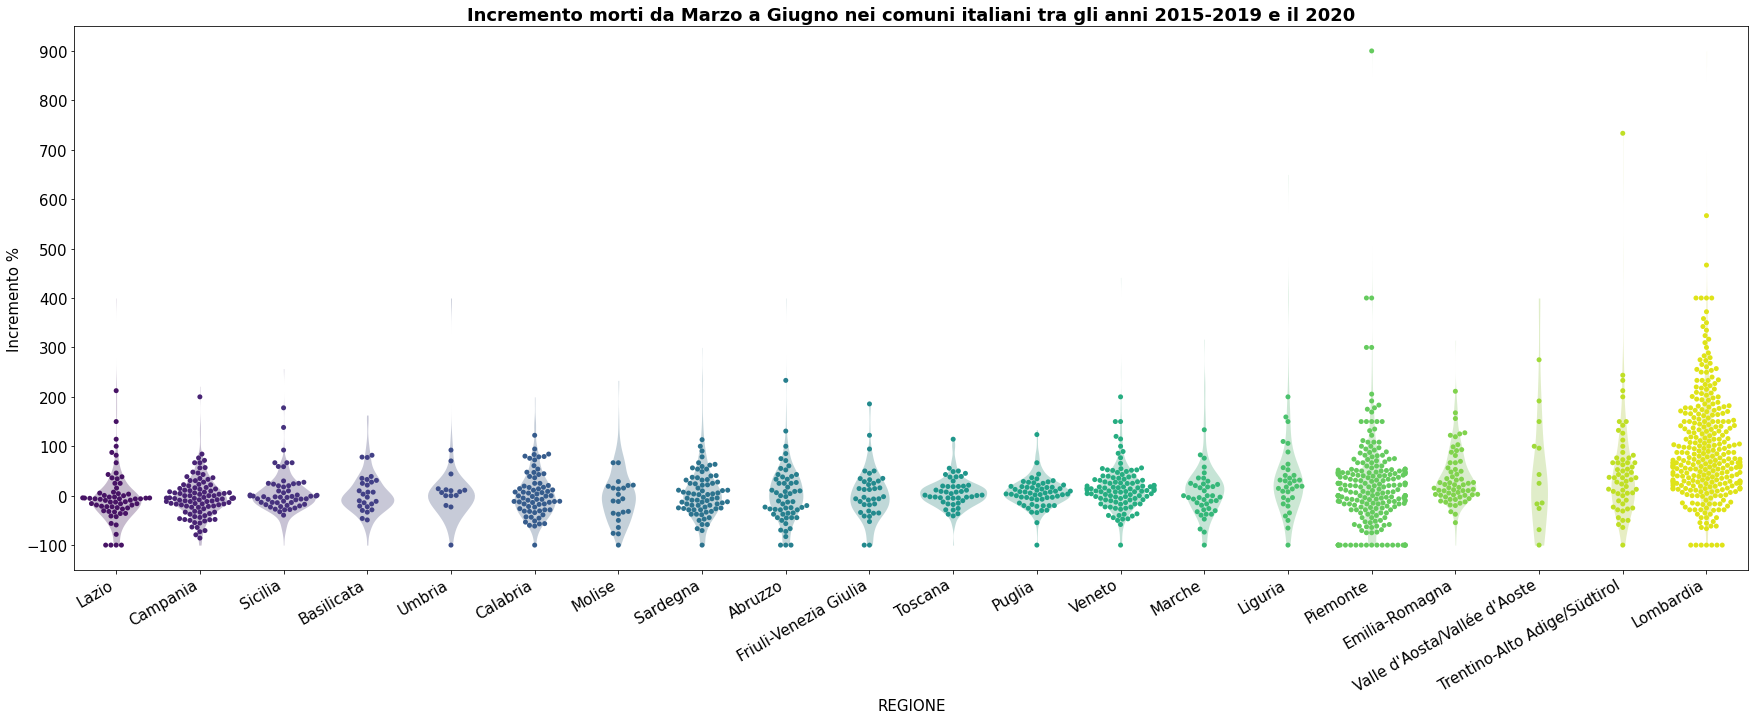

In [12]:
order = ['Lazio', 'Campania', 'Sicilia', 'Basilicata', 'Umbria', 'Calabria',
       'Molise', 'Sardegna', 'Abruzzo', 'Friuli-Venezia Giulia', 'Toscana',
       'Puglia', 'Veneto', 'Marche', 'Liguria', 'Piemonte', 'Emilia-Romagna',
       'Valle d\'Aosta/Vallée d\'Aoste', 'Trentino-Alto Adige/Südtirol',
       'Lombardia']

plt.figure(figsize=[30,10])
D = DATA.loc[:,('SESSO',slice(None),'M+F')]
D = pd.DataFrame((D.iloc[:,1]-D.iloc[:,0])/D.iloc[:,0]).rename(columns={0 : 'Incremento %'})*100
ax = sns.violinplot(data=D.sort_values('Incremento %').reset_index().replace({np.inf : np.nan}), x='REGIONE', y='Incremento %', order=order, palette='viridis', cut=0, linewidth=0)
plt.setp(ax.collections, alpha=.3)
ax = sns.swarmplot(data=D.sort_values('Incremento %').reset_index().replace({np.inf : np.nan}).iloc[::5,:], x='REGIONE', y='Incremento %', order=order, ax=ax, palette='viridis')
ax.set_title('Incremento morti da Marzo a Giugno nei comuni italiani tra gli anni 2015-2019 e il 2020', fontweight='bold')
ax.axes.set_yticks(np.linspace(-100,900,11))
ax.set_xticklabels(ax.get_xticklabels(),rotation=30, ha='right');

Distribuzioni dell'incremento dei morti nei comuni italiani, separate per regione. 
***

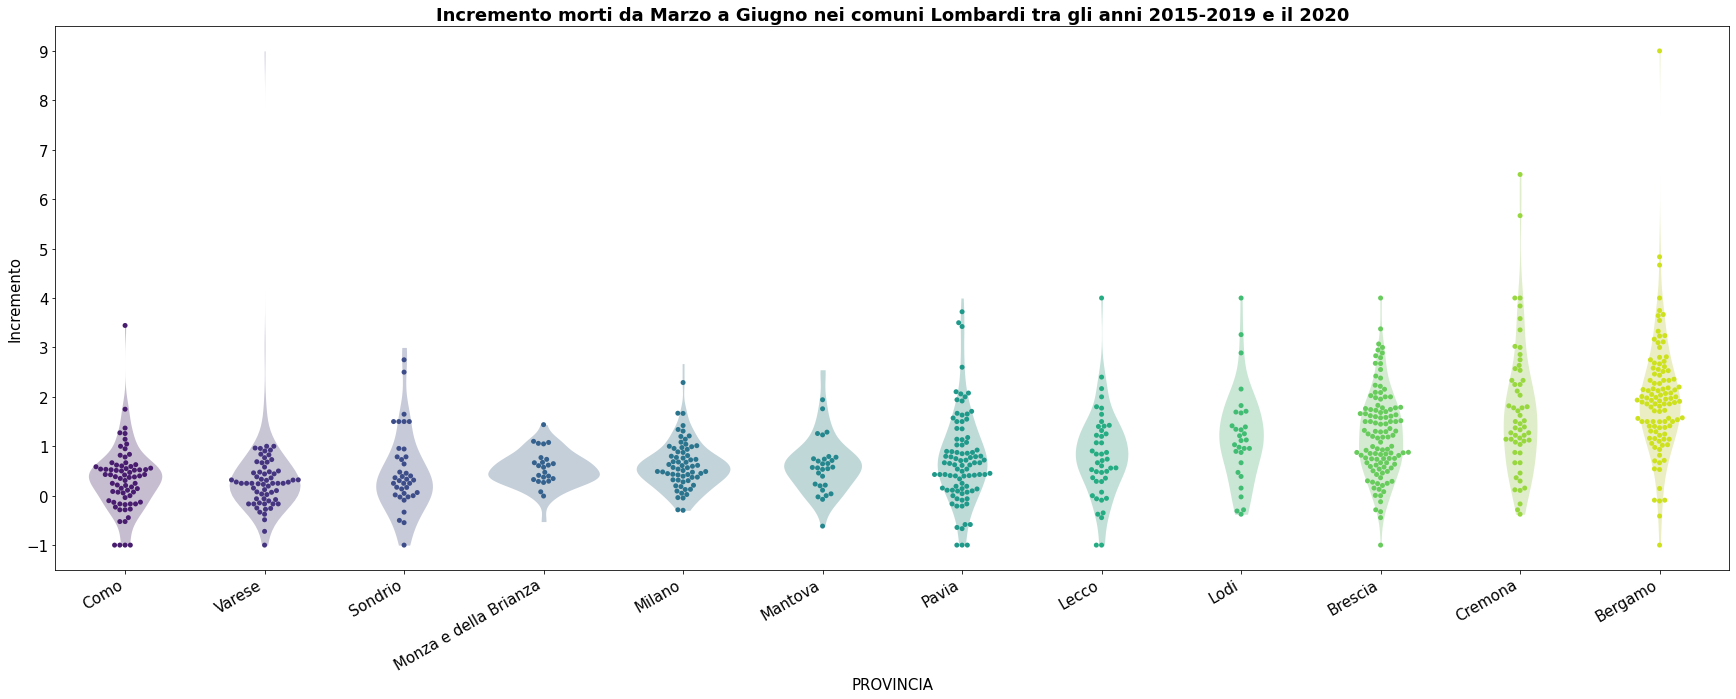

In [1058]:
order = ['Como', 'Varese', 'Sondrio', 'Monza e della Brianza', 'Milano',
       'Mantova', 'Pavia', 'Lecco', 'Lodi', 'Brescia', 'Cremona', 'Bergamo']
plt.figure(figsize=[30,10])
D = DATA.loc['Lombardia',('SESSO',slice(None),'M+F')]
D = pd.DataFrame((D.iloc[:,1]-D.iloc[:,0])/D.iloc[:,0]).rename(columns={0 : 'Incremento'})

ax = sns.violinplot(data=D.sort_values('Incremento').reset_index().replace({np.inf : np.nan}), x='PROVINCIA', y='Incremento', order=order, palette='viridis', cut=0, linewidth=0)
plt.setp(ax.collections, alpha=.3)
ax = sns.swarmplot(data=D.sort_values('Incremento').reset_index().replace({np.inf : np.nan}).iloc[::2,:], x='PROVINCIA', y='Incremento', order=order, palette='viridis', ax=ax)
ax.set_title('Incremento morti da Marzo a Giugno nei comuni Lombardi tra gli anni 2015-2019 e il 2020', fontweight='bold')
ax.axes.set_yticks(np.linspace(-1,9,11))
ax.set_xticklabels(ax.get_xticklabels(),rotation=30, ha='right');

È anche possibile analizzare le distribuzioni regione per regione, suddivise per province, ad esempio per la Lombardia
***